# Video Game Recommendation
The following notebook will demonstrate a data analysis and video game recommendation algorithm.

Please select a platform and genre:

Dropdown(description='Platform:', options=('X360', 'PS3', 'PS', 'DC', 'PS2', 'PS4', 'Wii', 'XB', 'XOne', 'GC',…

Dropdown(description='Genre:', options=('Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Raci…

Dropdown(description='Game:', options=('007: Quantum of Solace', 'Ace Combat: Assault Horizon', 'Adventure Tim…

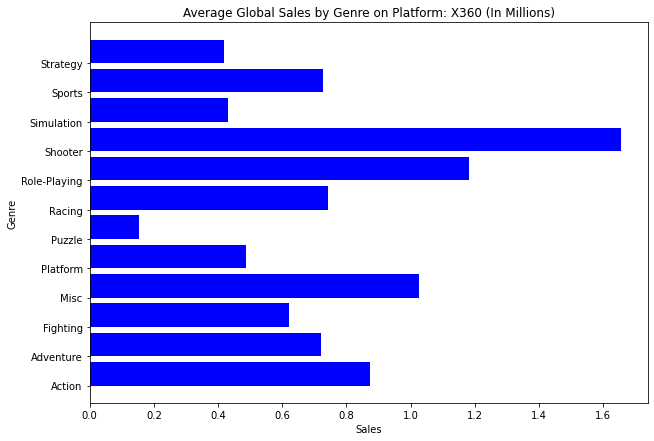

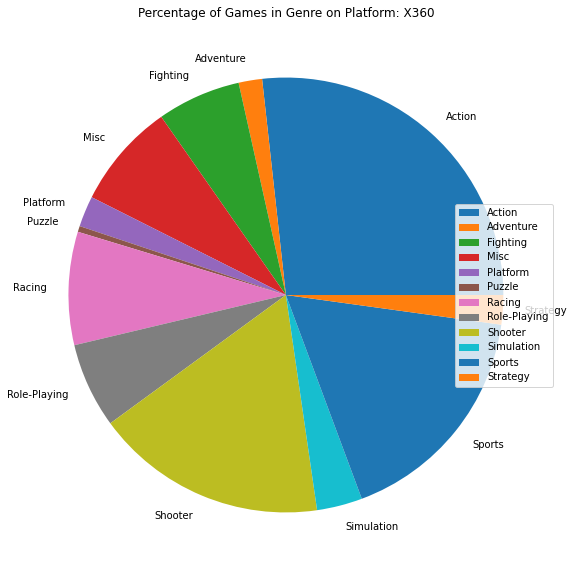

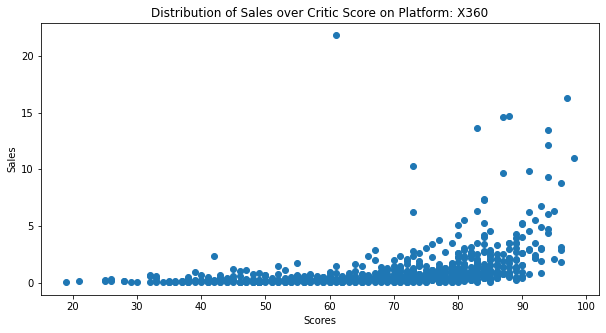

In [26]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import numpy as np
import ipywidgets as widgets
import IPython.core.display
import IPython.display

def refresh_games_list():
    global games_list
    global games_dropdown
    global selected_platform
    global selected_genre

    games_frame = videogame_database[(videogame_database["Platform"] == selected_platform) & (videogame_database["Genre"] == selected_genre)]
    games_list = games_frame["Name"].tolist()
    games_list.sort()

    try:
        games_dropdown.options = games_list
    except:
        pass


def platform_change(change):
    global selected_platform
    global selected_genre
    global genre_dropdown_list

    selected_platform = change["new"]

    selected_platform_frame = videogame_database[videogame_database["Platform"] == selected_platform]
    genre_dropdown_list = selected_platform_frame["Genre"].unique().tolist()
    genre_dropdown_list.sort()

    selected_genre = genre_dropdown_list[0]

    refresh_games_list()
    refresh_display()
    update_plots()


def genre_change(change):
    global selected_genre

    selected_genre = change["new"]

    refresh_games_list()


def refresh_display():
    global selected_platform
    global selected_genre
    global platform_dropdown
    global genre_dropdown
    global games_dropdown
    global platform_dropdown_list
    global genre_dropdown_list
    global games_list

    IPython.display.clear_output()

    platform_dropdown = widgets.Dropdown(options=platform_dropdown_list, description="Platform:", value=selected_platform)
    genre_dropdown = widgets.Dropdown(options=genre_dropdown_list, description="Genre:", value=selected_genre)
    games_dropdown = widgets.Dropdown(options=games_list, description="Game:", value = games_list[0])

    display(platform_dropdown)
    display(genre_dropdown)
    display(games_dropdown)

    platform_dropdown.observe(platform_change, names = "value")
    genre_dropdown.observe(genre_change, names = "value")


def update_plots():
    global videogame_database
    global selected_platform

    selected_platform_frame = videogame_database[videogame_database["Platform"] == selected_platform]
    genre = selected_platform_frame["Genre"].unique().tolist()
    genre.sort()

    figure1 = mpl.pyplot.figure(figsize=(10,7))
    figure2 = mpl.pyplot.figure(figsize=(20,10))
    figure3 = mpl.pyplot.figure(figsize=(10,5))

    # Calculate the average global sales for each platform.
    mean_global_sales = selected_platform_frame.sort_values("Genre").groupby(["Genre"])["Global_Sales"].mean()
    sales = mean_global_sales.tolist()

    title = "Average Global Sales by Genre on Platform: {0} (In Millions)".format(selected_platform)

    mpl.pyplot.figure(1)
    mpl.pyplot.barh(genre, sales, color ='blue', align="edge")
    mpl.pyplot.title(title)
    mpl.pyplot.xlabel("Sales")
    mpl.pyplot.ylabel("Genre")

    # Calculate the percentage of games in each genre on the platform.
    title = "Percentage of Games in Genre on Platform: {0}".format(selected_platform)

    genre_percentage = selected_platform_frame.sort_values("Genre").groupby(["Genre"])["Name"].count()

    mpl.pyplot.figure(2)
    mpl.pyplot.pie(genre_percentage, None, genre)
    mpl.pyplot.title(title)
    mpl.pyplot.legend(loc="right")

    # Calculate the scatter of global sales and critic scores on the platform.
    sales = selected_platform_frame["Global_Sales"]
    scores = selected_platform_frame["Critic_Score"]

    title = "Distribution of Sales over Critic Score on Platform: {0}".format(selected_platform)

    mpl.pyplot.figure(3)
    mpl.pyplot.scatter(scores, sales)
    mpl.pyplot.title(title)
    mpl.pyplot.xlabel("Scores")
    mpl.pyplot.ylabel("Sales")


videogame_database = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

platform_dropdown_list = videogame_database["Platform"].unique().tolist()

selected_platform = platform_dropdown_list[0]

selected_platform_frame = videogame_database[videogame_database["Platform"] == selected_platform]
genre_dropdown_list = selected_platform_frame["Genre"].unique().tolist()
genre_dropdown_list.sort()

selected_genre = genre_dropdown_list[0]

refresh_games_list()
refresh_display()
update_plots()